<a href="https://colab.research.google.com/github/jaskiratkalra26/zomato-stock-prediction/blob/main/zomato_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('zomato_new.csv')
df.head(5)
df.rename(columns={'Price':'Close','Vol.':'Volume'},inplace=True)
df['Volume'] = df['Volume'].str.replace('M','').astype('float32')
df.tail(10)

,Date,Close,Open,High,Low,Volume,Change %
886,06-08-2021,131.35,135.50,136.20,130.10,31.980000,-2.67%
887,05-08-2021,134.95,138.75,138.90,132.00,38.439999,-2.49%
888,04-08-2021,138.40,139.80,141.00,135.25,41.130001,-0.72%
889,03-08-2021,139.40,137.00,140.80,137.00,46.610001,-0.21%
890,02-08-2021,139.70,135.75,140.75,135.15,66.910004,4.64%
891,30-07-2021,133.50,142.60,142.70,131.00,88.309998,-5.69%
892,29-07-2021,141.55,134.95,144.00,132.20,117.970001,7.89%
893,28-07-2021,131.20,131.00,135.00,123.55,159.789993,-1.28%
894,27-07-2021,132.90,141.70,147.80,127.75,240.339996,-5.51%
895,26-07-2021,140.65,126.35,143.75,125.30,249.720001,11.63%


<Axes: ylabel='Close'>

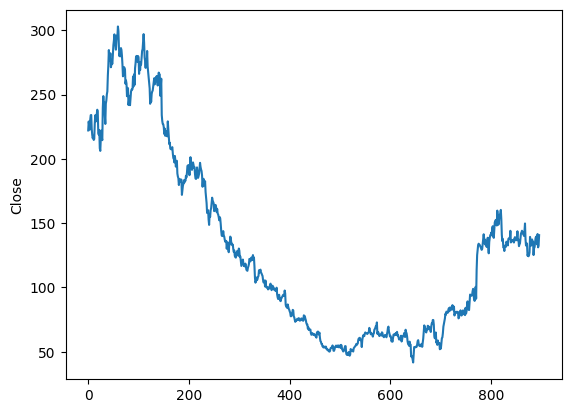

In [2]:
sns.lineplot(df['Close'])

<Axes: ylabel='Volume'>

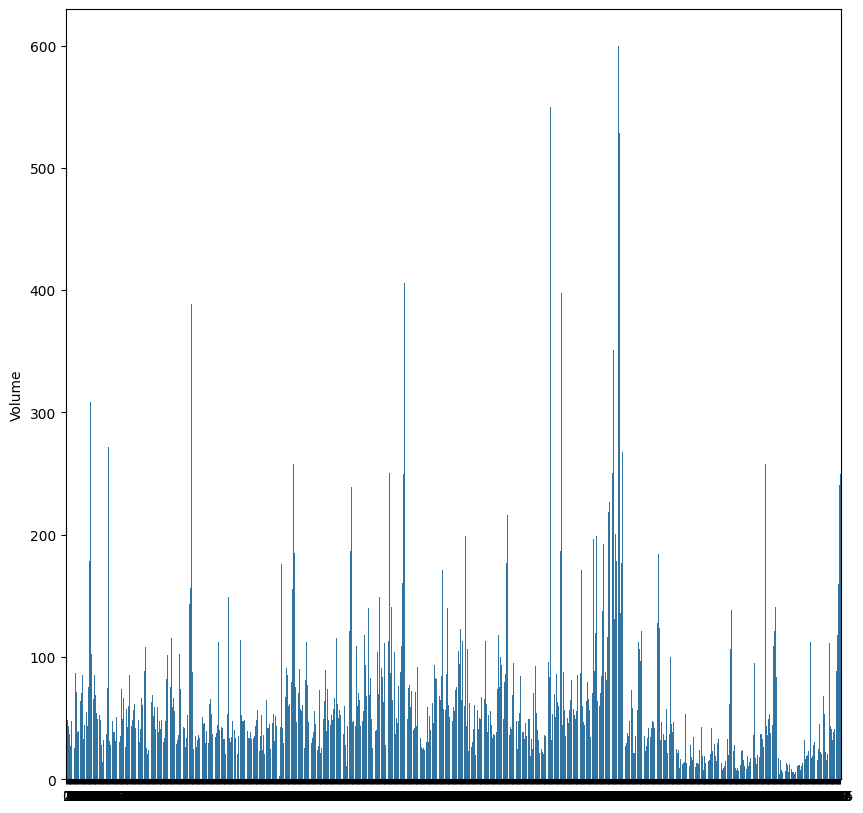

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.barplot(df['Volume'])

In [4]:
df = df.drop(['Date','Change %'],axis=1)
df.head(5)

,Close,Open,High,Low,Volume
0,222.10,226.00,228.46,217.82,115.470001
1,229.04,226.00,229.74,225.05,33.849998
2,225.63,224.20,230.18,223.05,48.480000
3,222.69,219.98,227.80,219.98,43.340000
4,230.36,233.00,238.73,228.87,36.770000


In [5]:
df.isna().sum()
df.dropna(inplace=True)
df.isna().sum()

,0
Close,0
Open,0
High,0
Low,0
Volume,0


**Classification Model**



---








In [6]:
df['Y'] = np.where(df['Close'].shift(-1)>df['Close'],1,0)
df.head(5)

,Close,Open,High,Low,Volume,Y
0,222.10,226.00,228.46,217.82,115.470001,1
1,229.04,226.00,229.74,225.05,33.849998,0
2,225.63,224.20,230.18,223.05,48.480000,0
3,222.69,219.98,227.80,219.98,43.340000,1
4,230.36,233.00,238.73,228.87,36.770000,1


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Open','High','Low','Close','Volume']] = scaler.fit_transform(df[['Open','High','Low','Close','Volume']])
df.head(5)


,Close,Open,High,Low,Volume,Y
0,0.690586,0.701724,0.707107,0.693213,0.188449,1
1,0.717145,0.701724,0.712025,0.721494,0.051654,0
2,0.704095,0.694902,0.713715,0.713671,0.076174,0
3,0.692843,0.678908,0.704572,0.701662,0.067559,1
4,0.722197,0.728255,0.746562,0.736437,0.056548,1


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Y',axis=1),df['Y'],test_size=0.1)
x_train

,Close,Open,High,Low,Volume
325,0.304822,0.307561,0.303112,0.313319,0.067643
837,0.370838,0.394353,0.386861,0.378056,0.019542
671,0.089361,0.102899,0.090665,0.091727,0.040861
739,0.155186,0.158044,0.151940,0.160767,0.017514
144,0.821431,0.807845,0.849597,0.815177,0.256562
...,...,...,...,...,...
547,0.078454,0.081675,0.070688,0.083708,0.030905
293,0.312093,0.318552,0.311564,0.312928,0.117052
29,0.758132,0.796475,0.806569,0.734011,0.166996
26,0.690011,0.677658,0.687860,0.687854,0.121711


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model = keras.Sequential([
    keras.layers.Dense(200,input_shape = (5,),activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100,activation = 'relu'),
     keras.layers.Dropout(0.2),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])
model.compile(optimizer = optimizer, loss = 'binary_crossentropy',metrics = ['accuracy'])
model.fit(x_train,y_train,epochs = 100)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.4870 - loss: 0.6924
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5431 - loss: 0.6924
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5367 - loss: 0.6927
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5221 - loss: 0.6911
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5373 - loss: 0.6917
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5637 - loss: 0.6901
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5002 - loss: 0.6915
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5529 - loss: 0.6881
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5117 - loss: 0.6919
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5630 - loss: 0.6878
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5233 - loss: 0.6883
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

In [10]:
model.evaluate(x_test,y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.6654 - loss: 0.6667


[0.669415295124054, 0.6666666865348816]

**Regression Model**

---



In [11]:
df['Y_reg'] = df['Close'].shift(-1)
df.head(5)
df = df.dropna()
df.head(5)

,Close,Open,High,Low,Volume,Y,Y_reg
0,0.690586,0.701724,0.707107,0.693213,0.188449,1,0.717145
1,0.717145,0.701724,0.712025,0.721494,0.051654,0,0.704095
2,0.704095,0.694902,0.713715,0.713671,0.076174,0,0.692843
3,0.692843,0.678908,0.704572,0.701662,0.067559,1,0.722197
4,0.722197,0.728255,0.746562,0.736437,0.056548,1,0.735859


In [12]:
df = df.drop('Y',axis=1)
df.head(5)


,Close,Open,High,Low,Volume,Y_reg
0,0.690586,0.701724,0.707107,0.693213,0.188449,0.717145
1,0.717145,0.701724,0.712025,0.721494,0.051654,0.704095
2,0.704095,0.694902,0.713715,0.713671,0.076174,0.692843
3,0.692843,0.678908,0.704572,0.701662,0.067559,0.722197
4,0.722197,0.728255,0.746562,0.736437,0.056548,0.735859


In [41]:
split = int(len(df) * 0.8)
y = df['Y_reg']
x = df.drop('Y_reg',axis=1)
x_train = x[:split]
y_train = y[:split]

x_test = x[split:]
y_test = y[split:]
x_train.head(5)
len(x_train)


715

In [33]:
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
n_input = 3
n_features = 5
generator = TimeseriesGenerator(x_train,y_train,length=n_input,batch_size=1)
generator[0]



(array([[[0.69058553, 0.70172446, 0.70710718, 0.69321338, 0.18844903],
         [0.71714504, 0.70172446, 0.71202459, 0.72149423, 0.05165421],
         [0.70409491, 0.69490241, 0.71371494, 0.71367103, 0.07617403]]]),
 array([0.72219671]))

In [34]:
model_reg = keras.Sequential([
    keras.layers.LSTM(256,input_shape = (3,5),activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model_reg.compile(optimizer = 'adam', loss = 'mse',metrics = ['mae'])
model_reg.fit(generator,epochs = 50)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


712/712 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0237 - mae: 0.0723
Epoch 2/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0029 - mae: 0.0345
Epoch 3/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0021 - mae: 0.0307
Epoch 4/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0020 - mae: 0.0291
Epoch 5/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0031 - mae: 0.0369
Epoch 6/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0015 - mae: 0.0255
Epoch 7/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0019 - mae: 0.0275
Epoch 8/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0017 - mae: 0.0285
Epoch 9/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0020 - mae: 0.0284
Epoch 10/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0023 - mae: 0.0311
Epoch 11/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0013 - mae: 0.0248
Epoch 12/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0016 - mae: 0.0270
Epoch 13/50
712/712 ━━━━━━━━━━━━━━━━

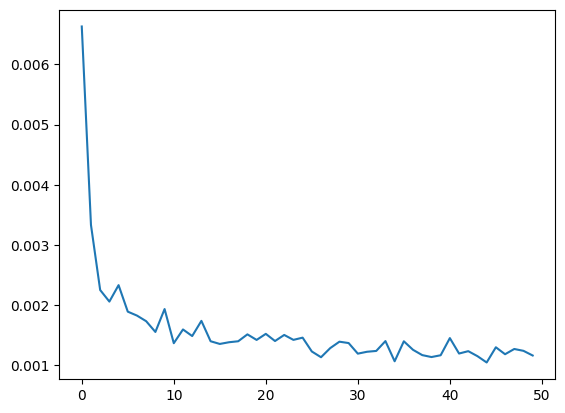

In [36]:
loss = model_reg.history.history['loss']
plt.plot(range(len(loss)),loss)

In [43]:
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
gen_test = TimeseriesGenerator(x_test,y_test,length=n_input,batch_size=1)
model_reg.evaluate(gen_test)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.3392e-04 - mae: 0.0161


[0.00042866665171459317, 0.015617462806403637]

In [45]:
predictions = model_reg.predict(gen_test)

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [46]:
actual = y_test[n_input:].reset_index(drop=True)


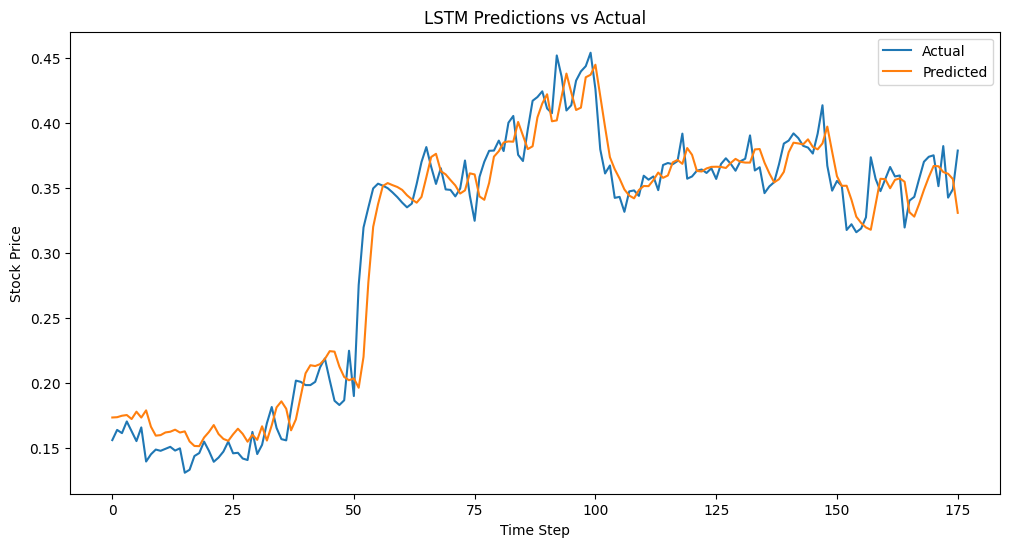

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('LSTM Predictions vs Actual')
plt.xlabel('Time Step')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
